# Punto 1 - Final - Miguel Rios Tangarife 

## Crear un gráfico de barras con las 10 palabras más frecuentes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
encoding = 'latin1'
ruta_archivo_csv = 'data/datoss.csv'
datosFinal = pd.read_csv(ruta_archivo_csv, encoding=encoding)

Verificamos que los datos estén correctamente y se lea el archivo csv

In [3]:
datosFinal

,Texto,Sentimiento
0,Aprendi regresiones,Positivo
1,Mucha tarea,Negativo
2,Aprendi modelos de texto,Positivo
3,Tareas muy largas,Negativo
4,Aprendi a utilizar imágenes,Positivo
5,El profe se demora en entregar las notas,Negativo
6,Me gusto competir por el mejor modelo,Positivo
7,Los examenes son largos,Negativo
8,Aprendi gradientes,Positivo
9,Aprendi NLP,Positivo


In [4]:
# Convertir todo el texto a minúsculas para que por ejemplo: Las y las cuenten por igual
datosFinal['Texto'] = datosFinal['Texto'].str.lower()

In [5]:
#Definimos stop_words
stop_words = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se',
    'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'es',
    'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'fue', 'ha'
]

In [6]:
# Eliminar stopwords durante el conteo de palabras frecuentes
palabras_frecuentes = (
    datosFinal['Texto']
    .apply(lambda x: [word for word in x.split() if word not in stop_words])
    .explode()
    .value_counts()
    .head(10)
)

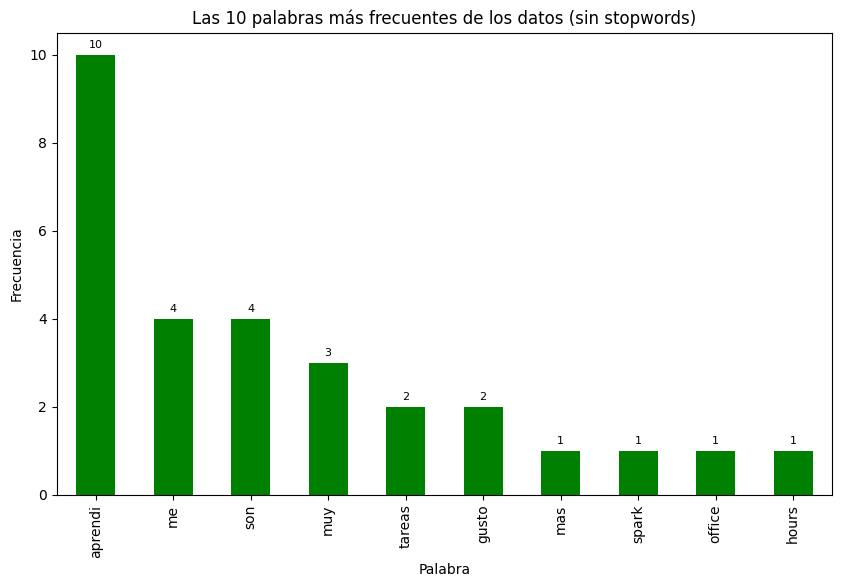

In [7]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
palabras_frecuentes.plot(kind='bar', ax=ax, color='green')
ax.set_title('Las 10 palabras más frecuentes de los datos (sin stopwords)')
ax.set_xlabel('Palabra')
ax.set_ylabel('Frecuencia')

# Para ver valores exactos de frecuencia
for i, v in enumerate(palabras_frecuentes):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

## Calcular la correlación con el sentimiento. Si el sentimiento positivo es 1 y el negativo es 0